In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
import re
%pylab inline

import textblob
from textblob import TextBlob
from nltk.corpus import stopwords
from textblob import Word

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("lyrics-v5.csv")
df = data.copy()

Populating the interactive namespace from numpy and matplotlib


C:\Users\HILAL-PC\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
df.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False


In [3]:
df[['released_year','released_month','released_date']] = df['album_rd'].str.split('-',expand=True).apply(pd.to_numeric)
df.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,released_year,released_month,released_date
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,2013,6,12
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,2013,6,12
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,2013,6,12
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,2013,6,12
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,2013,6,12


In [4]:
songs_number = df["eng_album_title"].value_counts()
songs_number

Love Yourself: Answer                               27
The Most Beautiful Moment In Life: Young Forever    23
MAP OF THE SOUL: 7                                  21
You Never Walk Alone                                18
WINGS                                               15
Dark and Wild                                       14
Skool Luv Affair (Special Addition)                 12
Love Yourself: Tear                                 11
Love Yourself: Her                                  11
Skool Luv Affair                                    10
O!RUL8,2?                                           10
2 Cool 4 Skool                                       9
The Most Beautiful Moment In Life Pt.2               9
The Most Beautiful Moment In Life Pt.1               9
BE                                                   8
MAP OF THE SOUL: PERSONA                             7
Dynamite (DayTime Version)                           6
Dynamite (NightTime Version)                         6
Name: eng_

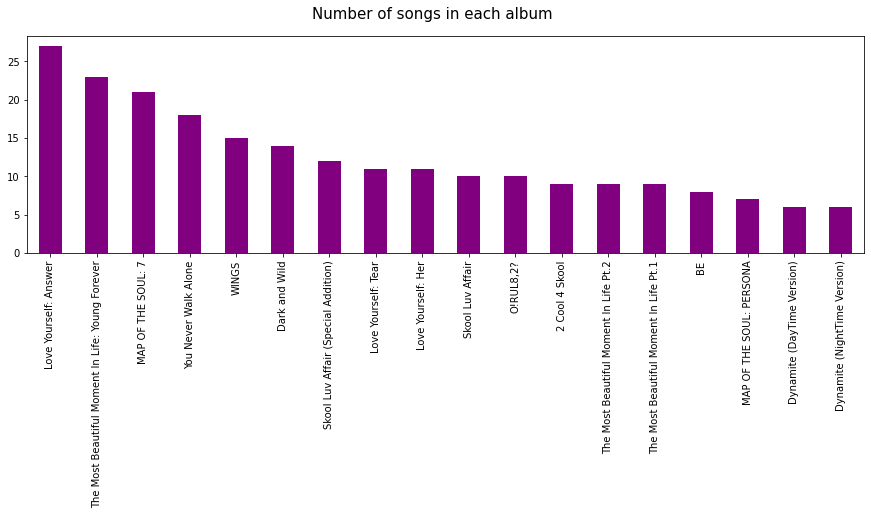

In [5]:
songs_number.plot.bar(x=songs_number.values, y=songs_number.index, figsize=(15,4), color="purple");
suptitle("Number of songs in each album",fontsize= 15, ha = 'center');

In [6]:
remixes = list(df['eng_track_title'][df['remix'] == True])
remixes = pd.Series([remixes[i].split('(')[0].rstrip() for i in range(len(remixes))]).value_counts()

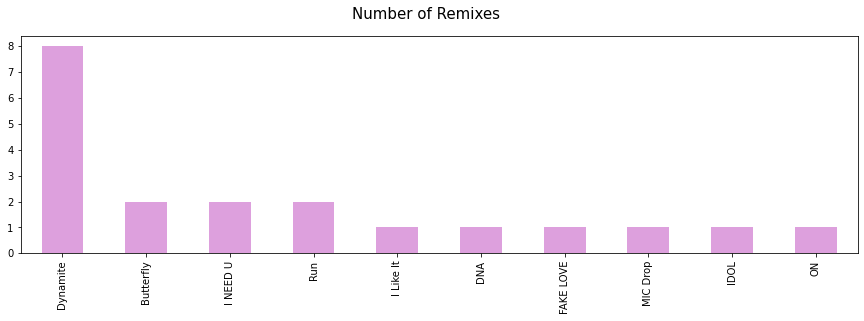

In [7]:
remixes.plot.bar(x=remixes.values, y=remixes.index, figsize=(15,4), color="plum");
suptitle("Number of Remixes",fontsize= 15, ha = 'center');

In [8]:
x_axis, y_axis =df['performed_by'].value_counts().index, df['performed_by'].value_counts().values

fig,ax = plt.subplots(figsize = (20,20))
fig.suptitle("Distribution of units and solo performances throughout the discography", ha = 'center',fontsize = 25)
plt.xlabel("Number of Performances",fontsize = 25, ha= "center")
plt.ylabel("Units",fontsize= 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

sns.barplot(x = y_axis, y = x_axis, color = 'tab:purple')
for i,v in enumerate(y_axis):
    ax.text(v+3.5,i,str(round((v/len(df))*100,2))+'%',fontsize=15,color= 'black')
    ax.text(1,i,v,fontsize=15,color= 'black')

In [9]:
df.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,released_year,released_month,released_date
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,2013,6,12
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,2013,6,12
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,2013,6,12
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,2013,6,12
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,2013,6,12


In [10]:
songs_year = df['released_year'].value_counts().sort_index()
songs_year.head()

2013    19
2014    36
2015    18
2016    38
2017    29
Name: released_year, dtype: int64

In [11]:
performed_by = df['performed_by'].value_counts().sort_values()
performed_by

V; JIMIN                     1
RM; SUGA                     1
V; SUGA; J-HOPE; JIMIN       1
JIN; RM; JUNGKOOK            1
JIN                          4
JUNGKOOK                     5
JIMIN                        5
V                            5
SUGA                         6
J-HOPE                       6
RM                           8
JUNGKOOK; V; JIMIN; JIN      9
RM; SUGA; J-HOPE            11
BTS                        165
Name: performed_by, dtype: int64

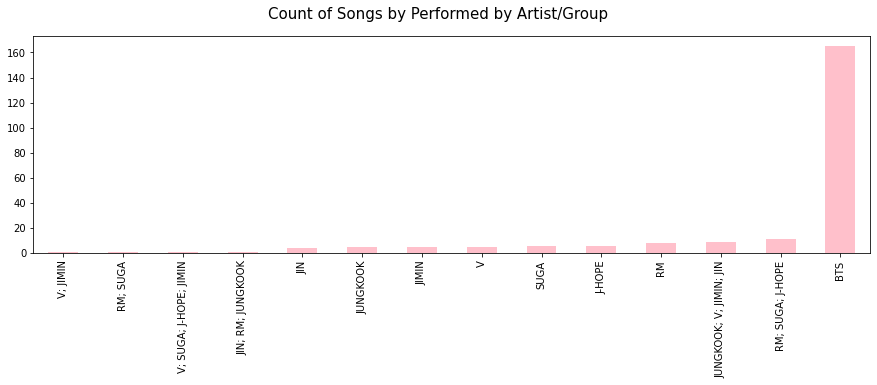

In [12]:
performed_by.plot.bar(x=performed_by.values, y=performed_by.index, figsize=(15,4), color="pink");
suptitle("Count of Songs by Performed by Artist/Group",fontsize= 15, ha = 'center');

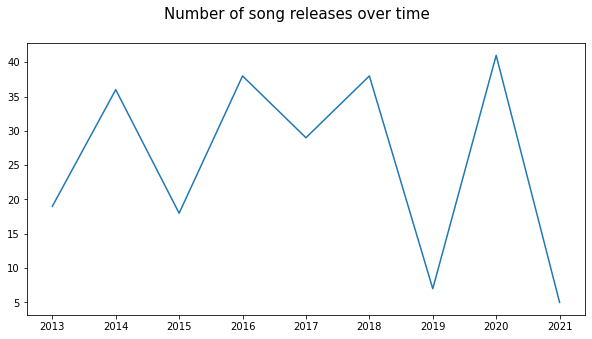

In [13]:
songs_year.plot(subplots=True, figsize=(10, 5), sharex=False, sharey=False)
suptitle("Number of song releases over time", ha = 'center',fontsize = 15)
plt.show()

In [14]:
song_language = df["lang"].value_counts()
song_language

KOR    211
ENG     16
Name: lang, dtype: int64

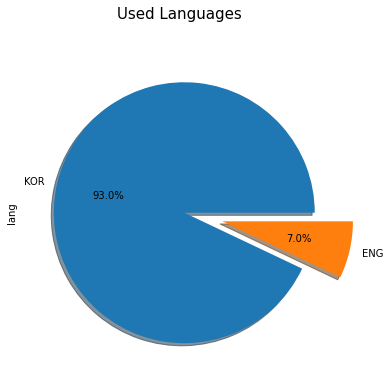

In [15]:
df["lang"].value_counts().plot.pie(autopct='%1.1f%%', 
    explode = [0, 0.3], figsize = (6, 6),shadow = True);
suptitle("Used Languages",fontsize= 15, ha = 'center');

In [16]:
# Eras of BTS Discography
eras = {1:['2 Cool 4 Skool','O!RUL8,2?','Skool Luv Affair','Skool Luv Affair (Special Addition)','Dark and Wild'],
        2:['화양연화 The Most Beautiful Moment In Life Pt.1',
       '화양연화 The Most Beautiful Moment In Life Pt.2',
       '화양연화 The Most Beautiful Moment In Life: Young Forever'],
       3:['Wings','You Never Walk Alone'],
        4:["Love Yourself 承 ‘Her’","LOVE YOURSELF 轉 ‘Tear’", "LOVE YOURSELF 結 ‘Answer’"],
       5:['MAP OF THE SOUL: PERSONA', 'MAP OF THE SOUL: 7'],
       6:['BE']}

In [17]:
df['lyrics'].isnull().sum()

7

In [18]:
df_lyrics = df[df['lyrics'].notnull()]
df_lyrics.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,released_year,released_month,released_date
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,2013,6,12
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,2013,6,12
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,2013,6,12
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,2013,6,12
5,5,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,6,좋아요 (I Like It),좋아요,I Like It,wanna be loved…\n\ndon’t wanna be fool wanna b...,False,False,NaN,BTS,False,KOR,False,2013,6,12


In [19]:
df_lyrics["lyrics"] = df_lyrics["lyrics"].apply(lambda x: " ".join(x.lower() for x in x.split()))

C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_10884/2160329053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyrics["lyrics"] = df_lyrics["lyrics"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [20]:
df_lyrics["lyrics"].head()

0    we’re now going to progress to some steps whic...
1    (what) give it to me (what) be nervous (what) ...
2    rap monster: it was a big hit v: year 2006! ra...
3    hey, what's your dream? hey, what’s your dream...
5    wanna be loved… don’t wanna be fool wanna be c...
Name: lyrics, dtype: object

In [21]:
df_lyrics["lyrics"] = df_lyrics["lyrics"].str.replace("[^\w\s]","")
df_lyrics["lyrics"] = df_lyrics["lyrics"].str.replace("\d","")

C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_10884/2097869227.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_lyrics["lyrics"] = df_lyrics["lyrics"].str.replace("[^\w\s]","")
C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_10884/2097869227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyrics["lyrics"] = df_lyrics["lyrics"].str.replace("[^\w\s]","")
C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_10884/2097869227.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_lyrics["lyrics"] = df_lyrics["lyrics"].str.replace("\d","")
C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_10884/2097869227.py:2: SettingWithCopyWarning: 
A value is try

In [22]:
sw = stopwords.words("english")
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
sw += ["don't",'even','will','m','go','let','oh','s','la','yeah',
    'll','re','na','don','know','na','want','pt','remix','ft','outro',
    'into','interlude','edition','full','length','skit','hey','ya']

In [24]:
df_lyrics["lyrics"] = df_lyrics["lyrics"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_10884/3423725761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyrics["lyrics"] = df_lyrics["lyrics"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))


In [25]:
df_lyrics["lyrics"]

0      going progress steps bit difficult ready set b...
1      give nervous one end bulletproof bulletproof b...
2      rap monster big hit v year rap monster fly mus...
3      whats dream whats dream whats dream dream wann...
5      wanna loved dont wanna fool wanna cool wanna l...
                             ...                        
225    cause im stars tonight watch bring fire set ni...
226    smooth like butter like criminal undercover go...
227    smooth like butter like criminal undercover go...
228    smooth like butter like criminal undercover go...
229    smooth like butter like criminal undercover go...
Name: lyrics, Length: 224, dtype: object

In [26]:
df_lyrics["lyrics"].apply(lambda x: TextBlob(x).words)

0      [going, progress, steps, bit, difficult, ready...
1      [give, nervous, one, end, bulletproof, bulletp...
2      [rap, monster, big, hit, v, year, rap, monster...
3      [whats, dream, whats, dream, whats, dream, dre...
5      [wan, na, loved, dont, wan, na, fool, wan, na,...
                             ...                        
225    [cause, im, stars, tonight, watch, bring, fire...
226    [smooth, like, butter, like, criminal, underco...
227    [smooth, like, butter, like, criminal, underco...
228    [smooth, like, butter, like, criminal, underco...
229    [smooth, like, butter, like, criminal, underco...
Name: lyrics, Length: 224, dtype: object

In [27]:
df_lyrics["lyrics"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

0      going progress step bit difficult ready set be...
1      give nervous one end bulletproof bulletproof b...
2      rap monster big hit v year rap monster fly mus...
3      whats dream whats dream whats dream dream wann...
5      wanna loved dont wanna fool wanna cool wanna l...
                             ...                        
225    cause im star tonight watch bring fire set nig...
226    smooth like butter like criminal undercover go...
227    smooth like butter like criminal undercover go...
228    smooth like butter like criminal undercover go...
229    smooth like butter like criminal undercover go...
Name: lyrics, Length: 224, dtype: object

In [28]:
tf1 = pd.Series(' '.join(df_lyrics['lyrics']).lower().split()).value_counts().reset_index()
tf1.columns = ['words', 'tf']
tf1

,words,tf
0,im,1126
1,like,973
2,dont,711
3,love,686
4,youre,535
...,...,...
4872,terrible,1
4873,fails,1
4874,increased,1
4875,noisy,1


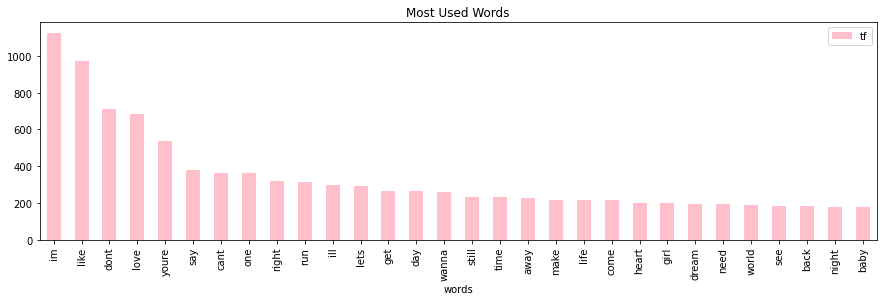

In [29]:
tf1[:30].plot.bar(x="words", y="tf", figsize=(15,4), color="pink");
plt.title('Most Used Words');

In [30]:
#!pip install nlp-rake
import nlp_rake

def word_cloud_generator (era_num):
    lyr = [df.loc[df['album_title'] == alb,'lyrics'] for alb in eras[era_num]]
    lyr = pd.concat([lyr[l] for l in range(len(lyr))],axis = 0).dropna()
    text = ''
    for k in lyr.index:
        text += lyr[k]

    extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
    res = extractor.apply(text)
    print(res[:10])
    
    wc = WordCloud(background_color='white',width=800,height=600)
    plt.figure(figsize=(15,7))
    plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

## Era 1 - School Trilogy

[('bang bang', 4.0), ('epik high', 4.0), ('hip hop', 4.0), ('hey ya', 4.0), ('good car', 4.0), ('i’m real', 4.0), ('promise ya', 4.0), ('real fact', 4.0), ('i’ll show', 4.0), ('rest stop', 4.0)]


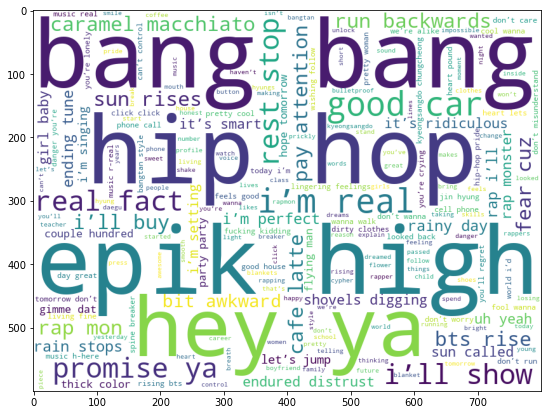

In [31]:
word_cloud_generator(1)

## Era 2 - Youth Trilogy

[('huh i’m', 4.0), ('i’ll treat', 4.0), ('girl girl', 4.0), ('wasn’t love', 4.0), ('i’m fair', 4.0), ('body burns', 4.0), ('gotta make', 4.0), ('it’s dope', 4.0), ('reject rejection', 4.0), ('hustle life', 4.0)]


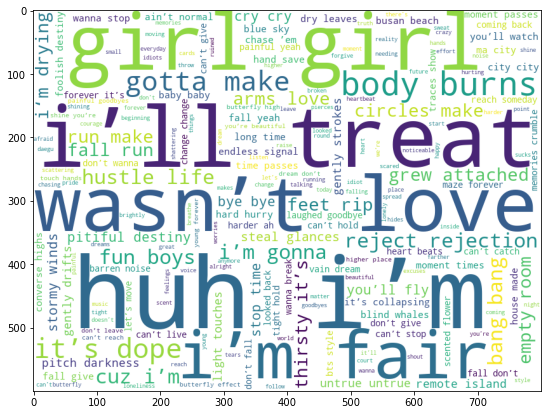

In [32]:
word_cloud_generator(2)

## Era 3 - Wings

[('lie find', 4.0), ('lie give', 4.0), ('lie pull', 4.0), ('pain save', 4.0), ('gave selflessly', 4.0), ('wide awake', 4.0), ('path lost', 4.0), ('constantly pushing', 4.0), ('exit lost', 4.0), ('ladies put', 4.0)]


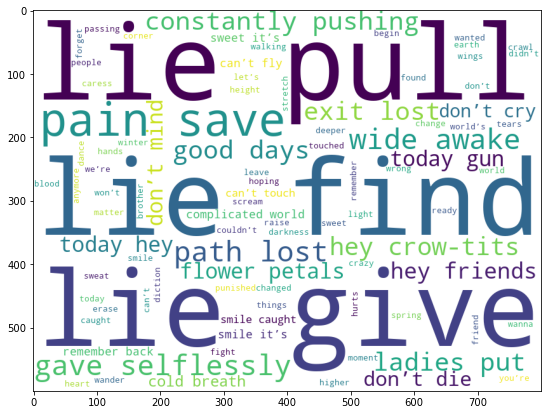

In [33]:
word_cloud_generator(3)

## Era 4 - Love yourself

[('calico cat', 4.0), ('hand reaching', 4.0), ('infinite centuries', 4.0), ('previous life', 4.0), ('real love', 4.0), ('true lovers', 4.0), ('it’s weird', 4.0), ('call love', 4.0), ('day summer', 4.0), ('illegal ille~gal', 4.0)]


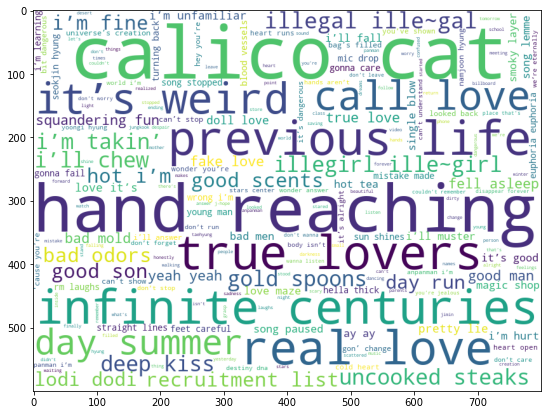

In [34]:
word_cloud_generator(4)

## Era 5 - Map Of the Soul

[('voices till', 4.0), ('flying high', 4.0), ('eyes yeah', 4.0), ('mi casa', 4.0), ('let’s steal', 4.0), ('fall asleep', 4.0), ('glass ay', 4.0), ('linked arms', 4.0), ('rap star', 4.0), ('call ya', 4.0)]


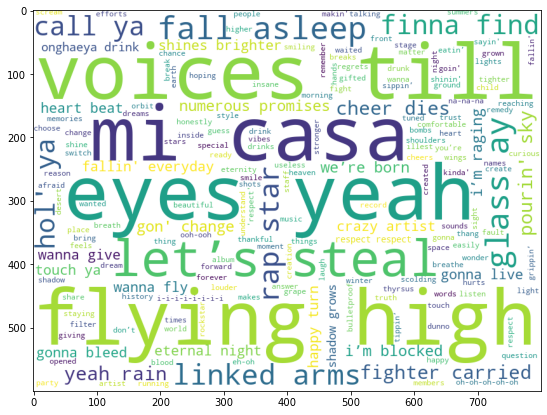

In [35]:
word_cloud_generator(5)

## Era 6 - BE

[('voices till', 4.0), ('flying high', 4.0), ('eyes yeah', 4.0), ('mi casa', 4.0), ('let’s steal', 4.0), ('fall asleep', 4.0), ('glass ay', 4.0), ('linked arms', 4.0), ('rap star', 4.0), ('call ya', 4.0)]


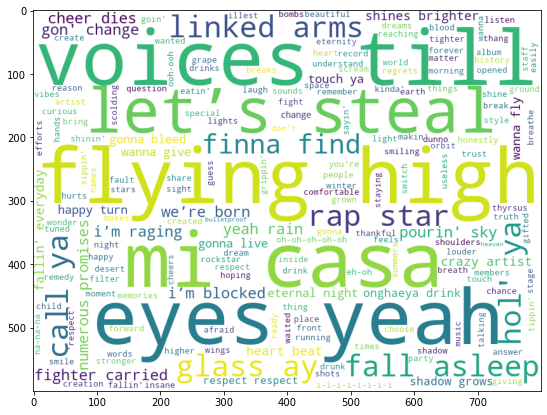

In [36]:
word_cloud_generator(5)